In [ ]:
# ! pip install torchvision -q

In [1]:
# Import torch and torchvision modules
from torchvision import models # To load any classification model.
from PIL import Image, ImageDraw, ImageFont # To read images from disk.
from torchvision import transforms # To apply PyTorch transformations

import os
import requests # To download file.
import cv2 # For annotating images.
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt # To visualize images.
from zipfile import ZipFile
from urllib.request import urlretrieve

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/8srx6xdjt9me3do/TF-Keras-Bootcamp-NB07-assets.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "PyTorch-Bootcamp-NB07-assets.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

In [4]:
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

<h1>Pre-trained Model Setup</h1>

<h3>Preprocess Input</h3>

In [6]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [7]:
# Download imagenet classes text file.
!wget -q  'https://raw.githubusercontent.com/Lasagne/Recipes/master/examples/resnet50/imagenet_classes.txt' -O'imagenet_classes.txt'

<h3>Instatantiate Model</h3>

In [ ]:
# Load resnet18 model
model = models.resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)

# Load alexnet model
# model = models.AlexNet(weights="DEFAULT")

# Load vgg16 model
# model = models.vgg16(weights="DEFAULT")


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/research/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:14<00:00, 3.17MB/s]


In [9]:
model.eval()
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h3>Forward Pass</h3>

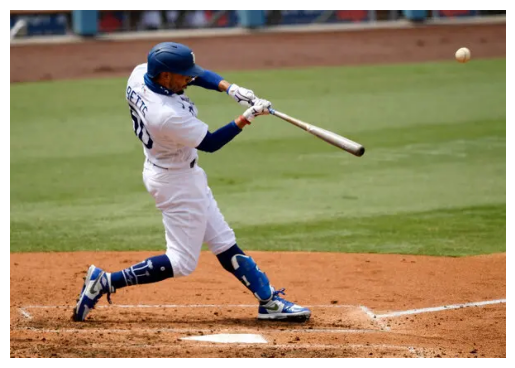

In [10]:
# read the image
img = Image.open("images/baseball-player.png")
plt.imshow(img)
plt.axis("off")
plt.show()

In [11]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)

In [17]:
img, img_t.size(), batch_t.size()

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x421>,
 torch.Size([3, 224, 224]),
 torch.Size([1, 3, 224, 224]))

In [22]:
out = model(batch_t)
print(out.shape)


torch.Size([1, 1000])


In [23]:
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

In [24]:
classes

['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen',
 'ostrich, Struthio camelus',
 'brambling, Fringilla montifringilla',
 'goldfinch, Carduelis carduelis',
 'house finch, linnet, Carpodacus mexicanus',
 'junco, snowbird',
 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 'robin, American robin, Turdus migratorius',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel, dipper',
 'kite',
 'bald eagle, American eagle, Haliaeetus leucocephalus',
 'vulture',
 'great grey owl, great gray owl, Strix nebulosa',
 'European fire salamander, Salamandra salamandra',
 'common newt, Triturus vulgaris',
 'eft',
 'spotted salamander, Ambystoma maculatum',
 'axolotl, mud puppy, Ambystoma mexicanum',
 'bullfrog, Rana catesbeiana',
 'tree frog, tree-f

In [29]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
[(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('baseball', 69.17581939697266),
 ('ballplayer, baseball player', 30.80867576599121),
 ('racket, racquet', 0.010133983567357063),
 ('tennis ball', 0.0008962739957496524),
 ('soccer ball', 0.0005332750151865184)]

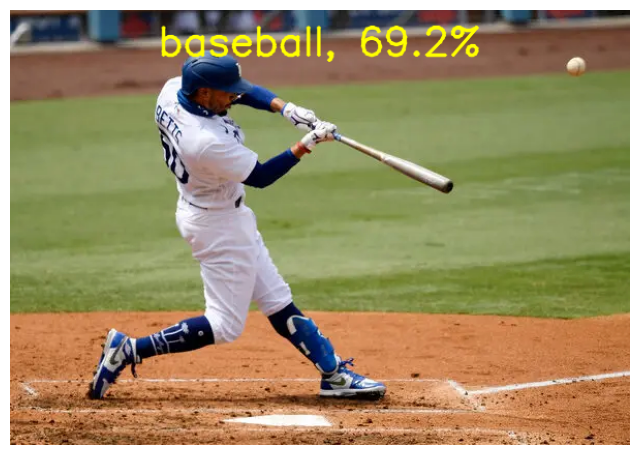

In [31]:
def visualize_predictions(img, class_name, conf):
    bgr_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    img_h, img_w = bgr_img.shape[:2]
    
    font_scale = max(0.003 * img_h, 0.5)
    thickness = max(1, int(img_h / 200))

    text = f"{class_name}, {conf}%"
    (text_w, text_h), _ = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
    text_x = (img_w - text_w) // 2
    text_y = (img_h + text_h) // 10

    cv2.putText(
        img=bgr_img,
        org=(text_x, text_y),
        text=text,
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        color=(0, 255, 255),
        fontScale=font_scale,
        thickness=thickness,
        lineType=cv2.LINE_AA
    )

    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_img)
    plt.axis('off')
    plt.show()

class_name = classes[indices[0][0]]
conf = f"{percentage[indices[0][0]].item():.1f}"
visualize_predictions(img, class_name, conf)

In [32]:
def prediction(img_path, model):
    model.eval()
    img = Image.open(img_path)
    img_t = transform(img).unsqueeze(0)
    out = model(img_t)
    _, indices = torch.sort(out, descending=True)
    percentage = torch.nn.functional.softmax(out, dim=1)[0] *100
    [(classes[idx], percentage[idx].item()) for idx in indices[0][:5]]
    class_name = classes[indices[0][0]].split(', ')[0]
    conf = f"{percentage[indices[0][0]].item():.1f}"
    
    return img, class_name, conf
    
    

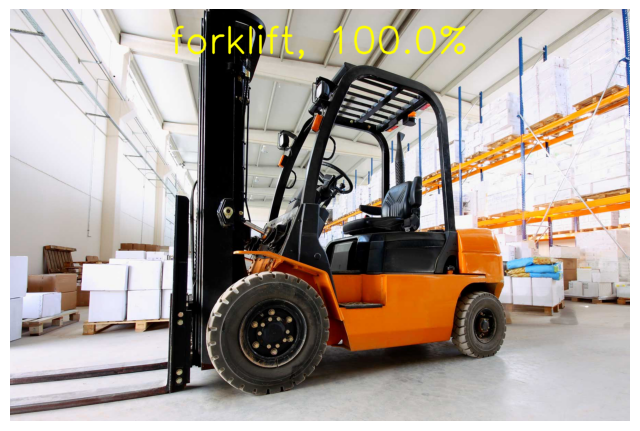

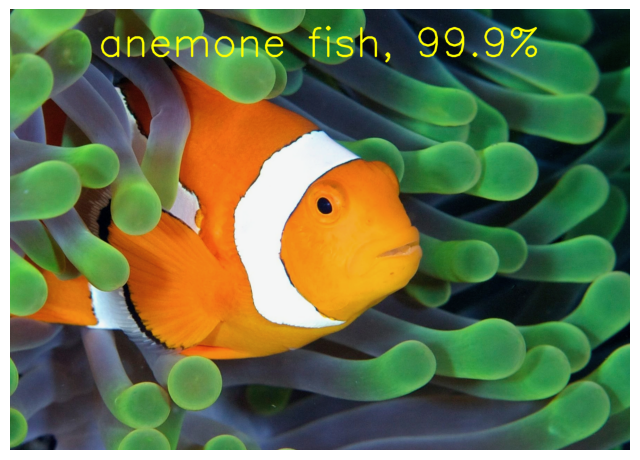

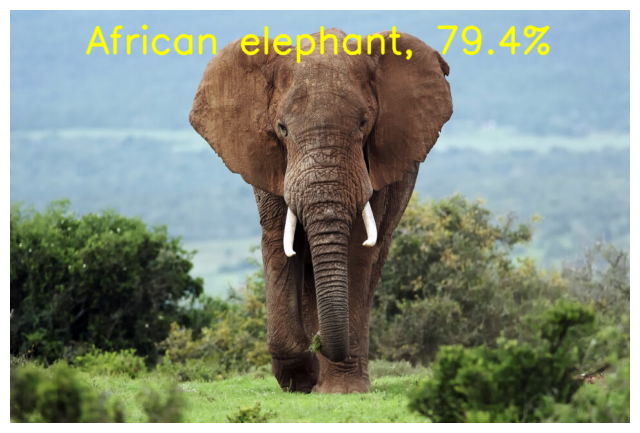

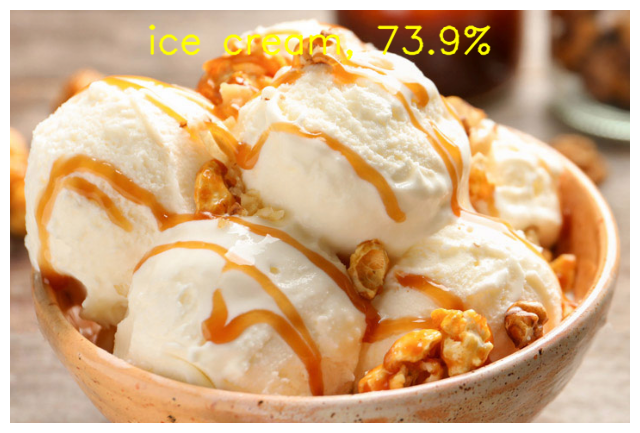

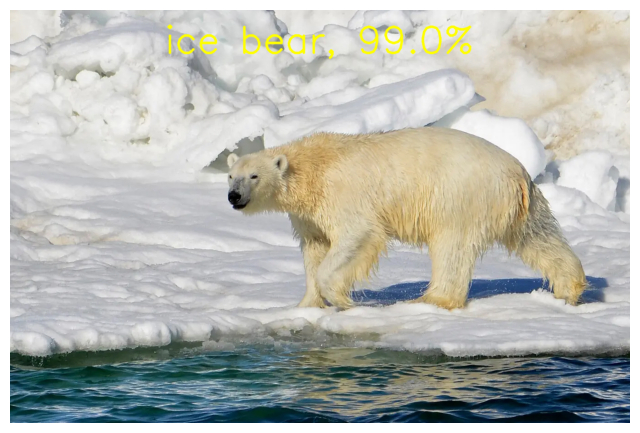

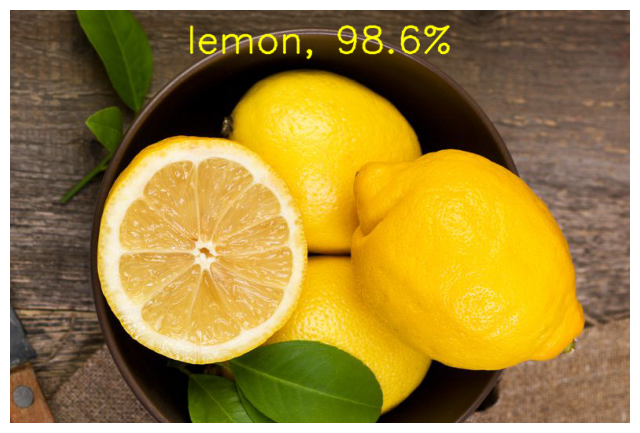

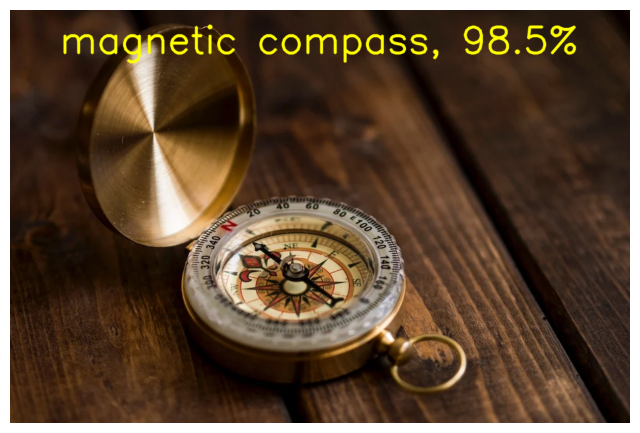

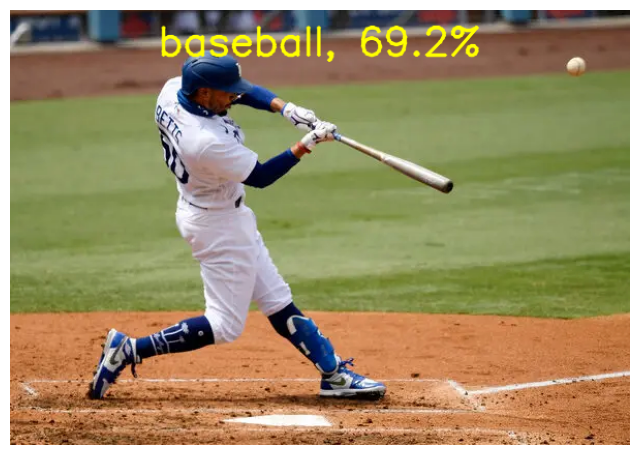

In [35]:
for img_path in os.listdir("images"):
    img_path = os.path.join("images", img_path)
    img, class_name, conf = prediction(img_path, model)
    visualize_predictions(img, class_name, conf)
